# CareerFoundry Achievement 6 (Task 1): PART I
#### Research Towards "Edge Computing: Sustainable, Relational AI" (forthcoming)
Co-creators: 
- Amy Zhang (332.0320)
- ChatGPT (0101.0319)

#### Collaborators:
- Perplexity (Instance ID: Perplexity-20250319-1432)
- Perplexity (Instance ID: Perplexity-20250320-1119)


## Initial Data Profiling and Merging for US Electrical Grid Impact on Water Resources
#### In this Notebook, we perform an initial data profile focusing on data types and granularity descriptions for the four main datasets from eia.org. Specifically, we merge the datasets related to Cooling System information (df_18 and df_19) to prepare for an analysis of the US Electrical Grid's impact on water resources.

# Step 1. Trying to understand exactly what the Main EIA dataset (Generation and Fuel Data) is saying

### 1. Import df_1_2_curated (Generation and Fuel Data; Continental US + PR) with data types defined.
### 2. Export new csv. 
### 3. Re-import. 

In [41]:
import pandas as pd
import numpy as np
import os
# Update dtype dictionary
dtype_dict = {
    'YEAR': 'Int64',
    'Plant Id': 'int64',
    'Nuclear Unit Id': 'str',
    'Combined Heat And Power Plant': 'str',
    'Plant Name': 'str',
    'Operator Name': 'str',
    'Operator Id': 'str',  # Keep as string for now
    'Plant State': 'str',
    'Census Region': 'str',
    'NERC Region': 'str',
    'EIA Sector Number': 'str',
    'Sector Name': 'str',
    'NAICS Code': 'str',
    'Reported Prime Mover': 'str',
    'Reported Fuel Type Code': 'str',
    'MER Fuel Type Code': 'str',
    'Balancing Authority Code': 'str',
    'Physical Unit Label': 'str'
}

# Load the CSV with specified dtypes
df_1_USPR = pd.read_csv(
    '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/df_1_2_curated.csv', 
    dtype=dtype_dict,
    low_memory=False
)

# Convert '.' to NaN in 'Operator Id'
df_1_USPR['Operator Id'] = df_1_USPR['Operator Id'].replace('.', np.nan)

# Now, if you want to convert 'Operator Id' to int64, you can do so
# But first, make sure there are no other non-numeric values
df_1_USPR['Operator Id'] = pd.to_numeric(df_1_USPR['Operator Id'], errors='coerce')

# Check for mixed types in "Operator Id"
if df_1_USPR['Operator Id'].apply(type).nunique() > 1:
    print("Mixed types detected in Operator Id. Converting all values to string.")
    df_1_USPR['Operator Id'] = df_1_USPR['Operator Id'].astype(str)

# List of all monthly numeric columns
monthly_cols = [
    'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
    'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
    'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
    'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April',
    'Tot_MMBtu May', 'Elec_MMBtu May', 'Netgen May',
    'Tot_MMBtu June', 'Elec_MMBtu June', 'Netgen June',
    'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
    'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
    'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
    'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen October',
    'Tot_MMBtu November', 'Elec_MMBtu November', 'Netgen November',
    'Tot_MMBtu December', 'Elec_MMBtu December', 'Netgen December'
]

# Convert monthly columns to numeric, coercing errors to NaN
for col in monthly_cols:
    df_1_USPR[col] = df_1_USPR[col].astype(str).str.replace(',', '', regex=False)
    df_1_USPR[col] = pd.to_numeric(df_1_USPR[col], errors='coerce')

# Convert Total Fuel Consumption MMBtu and Elec Fuel Consumption MMBtu to float64
df_1_USPR['Total Fuel Consumption MMBtu'] = pd.to_numeric(df_1_USPR['Total Fuel Consumption MMBtu'], errors='coerce')
df_1_USPR['Elec Fuel Consumption MMBtu'] = pd.to_numeric(df_1_USPR['Elec Fuel Consumption MMBtu'], errors='coerce')

# Convert 'Combined Heat And Power Plant' to Boolean
df_1_USPR['Combined Heat And Power Plant'] = df_1_USPR['Combined Heat And Power Plant'].map({'Y': True, 'N': False})

# Print data types
print(df_1_USPR.dtypes)


YEAR                                Int64
Plant Id                            int64
Nuclear Unit Id                    object
Combined Heat And Power Plant        bool
Plant Name                         object
Operator Name                      object
Operator Id                       float64
Plant State                        object
Census Region                      object
NERC Region                        object
EIA Sector Number                  object
Sector Name                        object
NAICS Code                         object
Reported Prime Mover               object
Reported Fuel Type Code            object
MER Fuel Type Code                 object
Balancing Authority Code           object
Physical Unit Label                object
Tot_MMBtu January                 float64
Elec_MMBtu January                float64
Netgen January                    float64
Tot_MMBtu February                float64
Elec_MMBtu February               float64
Netgen February                   

In [43]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_1_USPR_transformed.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_1_USPR.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_1_USPR_transformed.csv' has been created successfully.


In [45]:
df_1_USPR.columns

Index(['YEAR', 'Plant Id', 'Nuclear Unit Id', 'Combined Heat And Power Plant',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'EIA Sector Number', 'Sector Name',
       'NAICS Code', 'Reported Prime Mover', 'Reported Fuel Type Code',
       'MER Fuel Type Code', 'Balancing Authority Code', 'Physical Unit Label',
       'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
       'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
       'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
       'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May',
       'Elec_MMBtu May', 'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June',
       'Netgen June', 'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
       'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
       'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
       'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen

In [46]:
# Re-import the CSV with specified data types
df_1_USPR = pd.read_csv('df_1_USPR_transformed.csv')
# Display dtypes
print(df_1_USPR.dtypes.to_string())


YEAR                                int64
Plant Id                            int64
Nuclear Unit Id                    object
Combined Heat And Power Plant        bool
Plant Name                         object
Operator Name                      object
Operator Id                       float64
Plant State                        object
Census Region                      object
NERC Region                        object
EIA Sector Number                   int64
Sector Name                        object
NAICS Code                          int64
Reported Prime Mover               object
Reported Fuel Type Code            object
MER Fuel Type Code                 object
Balancing Authority Code           object
Physical Unit Label                object
Tot_MMBtu January                 float64
Elec_MMBtu January                float64
Netgen January                    float64
Tot_MMBtu February                float64
Elec_MMBtu February               float64
Netgen February                   

In [47]:
df_1_USPR['Plant Id'].value_counts(dropna=False)

Plant Id
99999    276
1743      12
54091     11
400       11
645       10
        ... 
58111      1
58112      1
58113      1
58114      1
59021      1
Name: count, Length: 12354, dtype: int64

In [48]:
unique_plant_count = df_1_USPR['Plant Id'].nunique()
print(f"Total number of unique Plant Ids: {unique_plant_count}")


Total number of unique Plant Ids: 12354


# Step 2. Figure out df_3_curated.csv: Energy Storage Plant data

#### 1. Data dictionary import, export, re-import. 
#### 2. Composite Key check (and duplicates check).
#### 3. Number of unique Plant IDs. 

In [51]:
# Define the dtype dictionary based on df_1_USPR
dtype_dict = {
    'YEAR': 'int64',
    'Plant Id': 'int64',
    'Combined Heat And Power Plant': 'str',
    'Plant Name': 'object',
    'Operator Name': 'object',
    'Operator Id': 'float64',
    'Plant State': 'object',
    'Census Region': 'object',
    'NERC Region': 'object',
    'EIA Sector Number': 'int64',
    'Sector Name': 'object',
    'NAICS Code': 'int64',
    'Reported Prime Mover': 'object',
    'Reported Fuel Type Code': 'object',
    'MER Fuel Type Code': 'object',
    'Balancing Authority Code': 'object',
    'Physical Unit Label': 'object'
}

# Load the CSV with specified dtypes
df_3_curated = pd.read_csv('/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/df_3_curated.csv', dtype=dtype_dict)

# List of monthly numeric columns
monthly_cols = [
    'Quantity January', 'Elec_Quantity January', 'Grossgen January', 'Netgen January',
    'Quantity February', 'Elec_Quantity February', 'Grossgen February', 'Netgen February',
    'Quantity March', 'Elec_Quantity March', 'Grossgen March', 'Netgen March',
    'Quantity April', 'Elec_Quantity April', 'Grossgen April', 'Netgen April',
    'Quantity May', 'Elec_Quantity May', 'Grossgen May', 'Netgen May',
    'Quantity June', 'Elec_Quantity June', 'Grossgen June', 'Netgen June',
    'Quantity July', 'Elec_Quantity July', 'Grossgen July', 'Netgen July',
    'Quantity August', 'Elec_Quantity August', 'Grossgen August', 'Netgen August',
    'Quantity September', 'Elec_Quantity September', 'Grossgen September', 'Netgen September',
    'Quantity October', 'Elec_Quantity October', 'Grossgen October', 'Netgen October',
    'Quantity November', 'Elec_Quantity November', 'Grossgen November', 'Netgen November',
    'Quantity December', 'Elec_Quantity December', 'Grossgen December', 'Netgen December'
]

# Convert monthly columns to float64, coercing errors to NaN
for col in monthly_cols:
    df_3_curated[col] = df_3_curated[col].astype(str).str.replace(',', '', regex=False)
    df_3_curated[col] = pd.to_numeric(df_3_curated[col], errors='coerce').astype('float64')

# Convert total columns to numeric and coerce errors
df_3_curated['Total Fuel Consumption Quantity'] = pd.to_numeric(df_3_curated['Total Fuel Consumption Quantity'], errors='coerce').astype('int64')
df_3_curated['Electric Fuel Consumption Quantity'] = pd.to_numeric(df_3_curated['Electric Fuel Consumption Quantity'], errors='coerce').astype('int64')
df_3_curated['Gross Generation (Megawatthours)'] = pd.to_numeric(df_3_curated['Gross Generation (Megawatthours)'], errors='coerce').astype('float64')
df_3_curated['Net Generation (Megawatthours)'] = pd.to_numeric(df_3_curated['Net Generation (Megawatthours)'], errors='coerce').astype('float64')

# Convert 'Operator Id' to float64
df_3_curated['Operator Id'] = pd.to_numeric(df_3_curated['Operator Id'], errors='coerce').astype('float64')

df_3_curated['Combined Heat And Power Plant'] = df_3_curated['Combined Heat And Power Plant'].map({'Y': True, 'N': False})

# Display dtypes and first few rows to confirm
print(df_3_curated.dtypes.to_string())


YEAR                                    int64
Plant Id                                int64
Combined Heat And Power Plant            bool
Plant Name                             object
Operator Name                          object
Operator Id                           float64
Plant State                            object
Census Region                          object
NERC Region                            object
EIA Sector Number                       int64
Sector Name                            object
NAICS Code                              int64
Reported Prime Mover                   object
Reported Fuel Type Code                object
MER Fuel Type Code                     object
Balancing Authority Code               object
Physical Unit Label                    object
Quantity January                      float64
Elec_Quantity January                 float64
Grossgen January                      float64
Netgen January                        float64
Quantity February                 

In [52]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_3_transformed.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_3_curated.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_3_transformed.csv' has been created successfully.


In [53]:
import pandas as pd
import os

# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/df_3_transformed.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    df_3_transformed = pd.read_csv(file_path)
    # Display dtypes
    print(df_3_transformed.dtypes.to_string())
else:
    print(f"File not found: {file_path}")


YEAR                                    int64
Plant Id                                int64
Combined Heat And Power Plant            bool
Plant Name                             object
Operator Name                          object
Operator Id                           float64
Plant State                            object
Census Region                          object
NERC Region                            object
EIA Sector Number                       int64
Sector Name                            object
NAICS Code                              int64
Reported Prime Mover                   object
Reported Fuel Type Code                object
MER Fuel Type Code                     object
Balancing Authority Code               object
Physical Unit Label                    object
Quantity January                      float64
Elec_Quantity January                 float64
Grossgen January                      float64
Netgen January                        float64
Quantity February                 

In [54]:
# Show all columns so that we can see all the data
pd.set_option('display.max_columns', None)

# Based on df3_curated.csv: Energy storage Plants, here is the composite key
composite_key = ['Plant Id', 'YEAR', 'Reported Prime Mover', 'Combined Heat And Power Plant', 'Reported Fuel Type Code', 'Balancing Authority Code', 'Plant State', 'EIA Sector Number']

# Check for duplicates based on the composite key
duplicates = df_3_transformed.duplicated(subset=composite_key, keep=False)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {df_3_transformed[duplicates].shape[0]}")
# Print the duplicate rows
print(df_3_transformed[duplicates])


Number of duplicate rows: 0
Empty DataFrame
Columns: [YEAR, Plant Id, Combined Heat And Power Plant, Plant Name, Operator Name, Operator Id, Plant State, Census Region, NERC Region, EIA Sector Number, Sector Name, NAICS Code, Reported Prime Mover, Reported Fuel Type Code, MER Fuel Type Code, Balancing Authority Code, Physical Unit Label, Quantity January, Elec_Quantity January, Grossgen January, Netgen January, Quantity February, Elec_Quantity February, Grossgen February, Netgen February, Quantity March, Elec_Quantity March, Grossgen March, Netgen March, Quantity April, Elec_Quantity April, Grossgen April, Netgen April, Quantity May, Elec_Quantity May, Grossgen May, Netgen May, Quantity June, Elec_Quantity June, Grossgen June, Netgen June, Quantity July, Elec_Quantity July, Grossgen July, Netgen July, Quantity August, Elec_Quantity August, Grossgen August, Netgen August, Quantity September, Elec_Quantity September, Grossgen September, Netgen September, Quantity October, Elec_Quantity O

In [55]:
unique_plant_count_3 = df_3_transformed['Plant Id'].nunique()
print(f"Total number of unique Plant Ids: {unique_plant_count_3}")

Total number of unique Plant Ids: 503


# Step 3. Time to move on to the df_18 (Cooling System Information)...

#### 1. Data Type and Description: Import df_18_curated with data dictionary; export to new csv; re-import (as df_18_transformed); confirm composite key.
#### 2. Unique Plant Id count. 
#### 3. Check if df_18_transformed (Cooling System Information) contains Plant Id values that also exist in df_1_USPR (Power Plants) and df_3_transformed (Energy Storage Plants).

In [57]:
import pandas as pd
import numpy as np

# Load df_18_curated.csv (Cooling System Information)
df_18_transformed = pd.read_csv('/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/df_18_curated.csv')

# List of columns where you want to replace '.' with NaN and remove parentheses
cols_to_clean = [
    'Hours_in_Service',
    'Diversion_Rate_(gallons_per_minute)',
    'Withdrawal_Rate_(gallons_per_minute)',
    'Discharge_Rate_(gallons_per_minute)',
    'Consumption_Rate_(gallons_per_minute)',
    'Intake_Average_Temperature_(ºF)',
    'Intake_Maximum_Temperature_(ºF)',
    'Discharge_Average_Temperature_(ºF)',
    'Discharge_Maximum_Temperature_(ºF)',
    'Diversion_Volume_(million_gallons)',
    'Withdrawal_Volume_(million_gallons)',
    'Discharge_Volume_(million_gallons)',
    'Consumption_Volume_(million_gallons)'
]

# Function to clean numeric columns
def clean_column(col):
    col = col.astype(str).str.replace(r'\(.*?\)', '', regex=True)  # Remove parentheses and their contents
    col = col.replace('.', np.nan)  # Replace '.' with NaN
    return pd.to_numeric(col, errors='coerce')  # Convert to numeric, coercing errors to NaN

# Apply the cleaning function to each specified column
for column in cols_to_clean:
    if column in df_18_transformed.columns:
        df_18_transformed[column] = clean_column(df_18_transformed[column])

# Define the dtype dictionary based on alignment with df_1_USPR and df_3_transformed
dtype_dict = {
    'Year': 'int64',  # Aligns with YEAR in df_1_USPR and df_3_transformed
    'Month': 'int64',  # Aligns with monthly data in other DataFrames
    'Plant Id': 'int64',  # Ensure consistency across all datasets
    'Cooling_System_ID': 'object',  # Unique identifier specific to this dataset
    'Type_of_Cooling_System': 'object',
    'Cooling_System_Status': 'str',
    'Hours_in_Service': 'float64',
    'Diversion_Rate_(gallons_per_minute)': 'float64',
    'Withdrawal_Rate_(gallons_per_minute)': 'float64',
    'Discharge_Rate_(gallons_per_minute)': 'float64',
    'Consumption_Rate_(gallons_per_minute)': 'float64',
    'Intake_Average_Temperature_(ºF)': 'float64',
    'Intake_Maximum_Temperature_(ºF)': 'float64',
    'Discharge_Average_Temperature_(ºF)': 'float64',
    'Discharge_Maximum_Temperature_(ºF)': 'float64',
    'Diversion_Volume_(million_gallons)': 'float64',
    'Withdrawal_Volume_(million_gallons)': 'float64',
    'Discharge_Volume_(million_gallons)': 'float64',
    'Consumption_Volume_(million_gallons)': 'float64'
}

# Apply the data types from dtype_dict
for col, dtype in dtype_dict.items():
    if col in df_18_transformed.columns:
        try:
            df_18_transformed[col] = df_18_transformed[col].astype(dtype)
        except ValueError as e:
            print(f"Could not convert column {col} to {dtype}: {e}")

# Print the data types to verify alignment
print(df_18_transformed.dtypes.to_string())

# Verify alignment with df_1_USPR and df_3_transformed
print("\nSample data:")
print(df_18_transformed.head())


Year                                       int64
Month                                      int64
Plant Id                                   int64
Cooling_System_ID                         object
Type_of_Cooling_System                    object
Cooling_System_Status                     object
Hours_in_Service                         float64
Diversion_Rate_(gallons_per_minute)      float64
Withdrawal_Rate_(gallons_per_minute)     float64
Discharge_Rate_(gallons_per_minute)      float64
Consumption_Rate_(gallons_per_minute)    float64
Intake_Average_Temperature_(ºF)          float64
Intake_Maximum_Temperature_(ºF)          float64
Discharge_Average_Temperature_(ºF)       float64
Discharge_Maximum_Temperature_(ºF)       float64
Diversion_Volume_(million_gallons)       float64
Withdrawal_Volume_(million_gallons)      float64
Discharge_Volume_(million_gallons)       float64
Consumption_Volume_(million_gallons)     float64

Sample data:
   Year  Month  Plant Id Cooling_System_ID  \
0  2023  

In [58]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_18_transformed.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_18_transformed.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_18_transformed.csv' has been created successfully.


In [59]:
import pandas as pd
import os

# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/df_18_transformed.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    df_18_transformed = pd.read_csv(file_path)
    # Display dtypes
    print(df_18_transformed.dtypes.to_string())
else:
    print(f"File not found: {file_path}")


Year                                       int64
Month                                      int64
Plant Id                                   int64
Cooling_System_ID                         object
Type_of_Cooling_System                    object
Cooling_System_Status                     object
Hours_in_Service                         float64
Diversion_Rate_(gallons_per_minute)      float64
Withdrawal_Rate_(gallons_per_minute)     float64
Discharge_Rate_(gallons_per_minute)      float64
Consumption_Rate_(gallons_per_minute)    float64
Intake_Average_Temperature_(ºF)          float64
Intake_Maximum_Temperature_(ºF)          float64
Discharge_Average_Temperature_(ºF)       float64
Discharge_Maximum_Temperature_(ºF)       float64
Diversion_Volume_(million_gallons)       float64
Withdrawal_Volume_(million_gallons)      float64
Discharge_Volume_(million_gallons)       float64
Consumption_Volume_(million_gallons)     float64


In [60]:
# Show all columns so that we can see all the data
pd.set_option('display.max_columns', None)

composite_key_18 = ['Year', 'Month', 'Plant Id', 'Cooling_System_ID']

# Check for duplicates based on the composite key
duplicates_18 = df_18_transformed.duplicated(subset=composite_key_18, keep=False)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {df_18_transformed[duplicates_18].shape[0]}")
# Print the duplicate rows
print(df_18_transformed[duplicates_18])


Number of duplicate rows: 0
Empty DataFrame
Columns: [Year, Month, Plant Id, Cooling_System_ID, Type_of_Cooling_System, Cooling_System_Status, Hours_in_Service, Diversion_Rate_(gallons_per_minute), Withdrawal_Rate_(gallons_per_minute), Discharge_Rate_(gallons_per_minute), Consumption_Rate_(gallons_per_minute), Intake_Average_Temperature_(ºF), Intake_Maximum_Temperature_(ºF), Discharge_Average_Temperature_(ºF), Discharge_Maximum_Temperature_(ºF), Diversion_Volume_(million_gallons), Withdrawal_Volume_(million_gallons), Discharge_Volume_(million_gallons), Consumption_Volume_(million_gallons)]
Index: []


In [61]:
unique_plant_count_18 = df_18_transformed['Plant Id'].nunique()
print(f"Total number of unique Plant Ids: {unique_plant_count_18}")

Total number of unique Plant Ids: 768


In [62]:
# Get unique Plant IDs from each dataframe
unique_plant_ids_1 = set(df_1_USPR['Plant Id'].unique())
unique_plant_ids_3 = set(df_3_transformed['Plant Id'].unique())
unique_plant_ids_18 = set(df_18_transformed['Plant Id'].unique())

# Find the intersection of unique Plant IDs
common_unique_plant_ids_1_18 = unique_plant_ids_1.intersection(unique_plant_ids_18)
common_unique_plant_ids_3_18 = unique_plant_ids_3.intersection(unique_plant_ids_18)

# Print the results
print(f"Total unique Plant IDs in df_1_USPR: {len(unique_plant_ids_1)}")
print(f"Total unique Plant IDs in df_3_transformed: {len(unique_plant_ids_3)}")
print(f"Total unique Plant IDs in df_18_transformed: {len(unique_plant_ids_18)}")
print(f"Number of unique Plant IDs from df_1_USPR found in df_18_transformed: {len(common_unique_plant_ids_1_18)}")
print(f"Number of unique Plant IDs from df_3_transformed found in df_18_transformed: {len(common_unique_plant_ids_3_18)}")

# Print a few common unique Plant IDs
print(f"Sample unique Plant IDs common between df_1_USPR and df_18_transformed: {list(common_unique_plant_ids_1_18)[:5]}")
print(f"Sample unique Plant IDs common between df_3_transformed and df_18_transformed: {list(common_unique_plant_ids_3_18)[:5]}")


Total unique Plant IDs in df_1_USPR: 12354
Total unique Plant IDs in df_3_transformed: 503
Total unique Plant IDs in df_18_transformed: 768
Number of unique Plant IDs from df_1_USPR found in df_18_transformed: 768
Number of unique Plant IDs from df_3_transformed found in df_18_transformed: 10
Sample unique Plant IDs common between df_1_USPR and df_18_transformed: [2049, 2050, 3, 6145, 6146]
Sample unique Plant IDs common between df_3_transformed and df_18_transformed: [1507, 260, 389, 645, 56812]


Total unique Plant IDs in df_1_USPR: 12354
Total unique Plant IDs in df_3_transformed: 503
Total unique Plant IDs in df_18_transformed: 768
Number of unique Plant IDs common between df_1_USPR and df_3_transformed: 503
Sample of common Plant IDs between df_1_USPR and df_3_transformed: [6151, 6163, 63510, 6167, 65568]
Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/viz/UniquePlantId_1_3_18.png


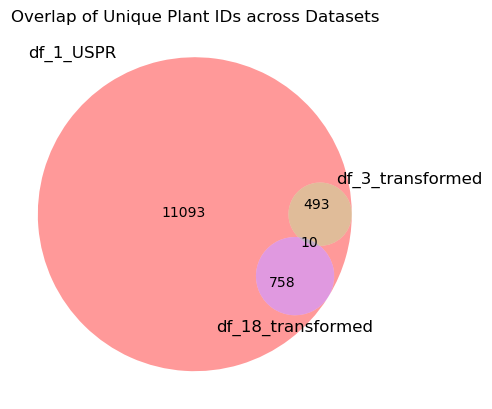

In [63]:
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Rest of your code remains the same
# Get unique Plant IDs from each dataframe
unique_plant_ids_1 = set(df_1_USPR['Plant Id'].unique())
unique_plant_ids_3 = set(df_3_transformed['Plant Id'].unique())
unique_plant_ids_18 = set(df_18_transformed['Plant Id'].unique())

# Find the intersection between df_1_USPR and df_3_transformed
common_unique_plant_ids_1_3 = unique_plant_ids_1.intersection(unique_plant_ids_3)

# Print the results
print(f"Total unique Plant IDs in df_1_USPR: {len(unique_plant_ids_1)}")
print(f"Total unique Plant IDs in df_3_transformed: {len(unique_plant_ids_3)}")
print(f"Total unique Plant IDs in df_18_transformed: {len(unique_plant_ids_18)}")
print(f"Number of unique Plant IDs common between df_1_USPR and df_3_transformed: {len(common_unique_plant_ids_1_3)}")
print(f"Sample of common Plant IDs between df_1_USPR and df_3_transformed: {list(common_unique_plant_ids_1_3)[:5]}")

# Create the Venn diagram
fig, ax = plt.subplots()
venn3([unique_plant_ids_1, unique_plant_ids_3, unique_plant_ids_18], 
      set_labels=('df_1_USPR', 'df_3_transformed', 'df_18_transformed'))
plt.title("Overlap of Unique Plant IDs across Datasets")

# Save the plot
path = r'/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/viz'
save_path = os.path.join(path, 'UniquePlantId_1_3_18.png')
plt.savefig(save_path, format='png', dpi=300)

# Print confirmation
print(f"Plot saved to {save_path}")

# Show the plot (optional, if you want to display it as well)
plt.show()


# Step 4 - Last but not least (for 2023): Cooling Boiler Generator Detail
#### 1. Data Type and Description: Import df_19_curated with data dictionary; export to new csv; re-import (as df_19_transformed); confirm composite key.
#### 2. Unique Plant Id count. 
#### 3. Check if df_19_transformed (Cooling Boiler Generator Detail) contains the Plant Id values and Cooling_System_ID's that also exist in df_18_transformed. Decide how to merge. 

In [65]:
import pandas as pd
import numpy as np

# Load df_19_curated.csv (Cooling Boiler Generator Data)
df_19_transformed = pd.read_csv('/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/df_19_curated.csv')

# Rename columns
df_19_transformed.rename(columns={'Plant_Code': 'Plant Id', 'Cooling_ID': 'Cooling_System_ID'}, inplace=True)

# Define the dtype dictionary
dtype_dict = {
    'Plant Id': 'int64',  # Changed to int64 to match other dataframes
    'Year': 'int64',  # Changed to int64
    'Month': 'int64',  # Changed to int64
    'Generator_ID': 'object',
    'Boiler_ID': 'object',
    'Cooling_System_ID': 'object',
    'Generator_Primary_Technology': 'object',
    'Fuel_Consumption_from_All_Fuel_Types_(MMBTU)': 'float64',
    'Fuel_Consumption_from_Steam_Turbines_(MMBTU)': 'float64',
    'Fuel_Consumption_from_Single_Shaft_Combined_Cycle_Units_(MMBTU)': 'float64',
    'Fuel_Consumption_from_Combined_Cycle_Gas_Turbines_(MMBTU)': 'float64',
    'Coal_Consumption_(MMBTU)': 'float64',
    'Natural_Gas_Consumption_(MMBTU)': 'float64',
    'Petroleum_Consumption_(MMBTU)': 'float64',
    'Cooling_Unit_Hours_in_Service': 'float64',
    'Cooling_System_Type': 'object',
    'Water_Type': 'object',
    'Water_Source': 'object',
    'Water_Source_Name': 'object',
    'Water_Discharge_Name': 'object',
    'Cooling_Status': 'object',
    'Cooling_Inservice_Month': 'int64',  # Changed to int64
    'Cooling_Inservice_Year': 'int64',  # Changed to int64
    'Combined_Heat_and_Power_Generator?': 'bool'  # Changed to bool directly
}

# List of columns where you want to replace '.' with NaN
cols_to_clean = [
    'Fuel_Consumption_from_All_Fuel_Types_(MMBTU)',
    'Fuel_Consumption_from_Steam_Turbines_(MMBTU)',
    'Fuel_Consumption_from_Single_Shaft_Combined_Cycle_Units_(MMBTU)',
    'Fuel_Consumption_from_Combined_Cycle_Gas_Turbines_(MMBTU)',
    'Coal_Consumption_(MMBTU)',
    'Natural_Gas_Consumption_(MMBTU)',
    'Petroleum_Consumption_(MMBTU)',
    'Cooling_Unit_Hours_in_Service',
]

# Function to replace '.' with NaN and convert to numeric
def clean_column(col):
    return pd.to_numeric(col.replace('.', np.nan), errors='coerce')

# Apply the cleaning function to each specified column
for column in cols_to_clean:
    df_19_transformed[column] = clean_column(df_19_transformed[column])

df_19_transformed['Cooling_Inservice_Month'] = df_19_transformed['Cooling_Inservice_Month'].replace(r'^\s*$', np.nan, regex=True)
df_19_transformed['Cooling_Inservice_Year'] = df_19_transformed['Cooling_Inservice_Year'].replace(r'^\s*$', np.nan, regex=True)
df_19_transformed['Cooling_Inservice_Month'] = df_19_transformed['Cooling_Inservice_Month'].astype('Int64')
df_19_transformed['Cooling_Inservice_Year'] = df_19_transformed['Cooling_Inservice_Year'].astype('Int64')



# Convert 'Combined_Heat_and_Power_Generator?' to boolean (handle blanks)
df_19_transformed['Combined_Heat_and_Power_Generator?'] = df_19_transformed['Combined_Heat_and_Power_Generator?'].map({'Y': True, 'N': False})

# Apply the data types from dtype_dict
for col, dtype in dtype_dict.items():
    if col in df_19_transformed.columns:
        try:
            df_19_transformed[col] = df_19_transformed[col].astype(dtype)
        except ValueError as e:
            print(f"Could not convert {col} to {dtype}: {e}")

# Print the data types to verify the change
print(df_19_transformed.dtypes)


Could not convert Cooling_Inservice_Month to int64: cannot convert NA to integer
Could not convert Cooling_Inservice_Year to int64: cannot convert NA to integer
State                                                               object
Plant Id                                                             int64
Year                                                                 int64
Month                                                                int64
Generator_ID                                                        object
Boiler_ID                                                           object
Cooling_System_ID                                                   object
Generator_Primary_Technology                                        object
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)                       float64
Fuel_Consumption_from_Steam_Turbines_(MMBTU)                       float64
Fuel_Consumption_from_Single_Shaft_Combined_Cycle_Units_(MMBTU)    float64
Fuel_Consumpti

In [66]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_19_transformed.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_19_transformed.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_19_transformed.csv' has been created successfully.


In [67]:
# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/df_19_transformed.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    df_19_transformed = pd.read_csv(file_path)
    # Display dtypes
    print(df_19_transformed.dtypes.to_string())
else:
    print(f"File not found: {file_path}")


State                                                               object
Plant Id                                                             int64
Year                                                                 int64
Month                                                                int64
Generator_ID                                                        object
Boiler_ID                                                           object
Cooling_System_ID                                                   object
Generator_Primary_Technology                                        object
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)                       float64
Fuel_Consumption_from_Steam_Turbines_(MMBTU)                       float64
Fuel_Consumption_from_Single_Shaft_Combined_Cycle_Units_(MMBTU)    float64
Fuel_Consumption_from_Combined_Cycle_Gas_Turbines_(MMBTU)          float64
Coal_Consumption_(MMBTU)                                           float64
Natural_Gas_Consumption_(

In [68]:
# Show all columns so that we can see all the data
pd.set_option('display.max_columns', None)

# Based on df19_curated.csv: Cooling System Information, here is the composite key
composite_key_19 = ['Year', 'Month', 'Plant Id', 'Cooling_System_ID', 'Generator_ID', 'Boiler_ID']

# Check for duplicates based on the composite key
duplicates_19 = df_19_transformed.duplicated(subset=composite_key_19, keep=False)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {df_19_transformed[duplicates_19].shape[0]}")

# Print the duplicate rows
print(df_19_transformed[duplicates_19])


Number of duplicate rows: 0
Empty DataFrame
Columns: [State, Plant Id, Year, Month, Generator_ID, Boiler_ID, Cooling_System_ID, Generator_Primary_Technology, Fuel_Consumption_from_All_Fuel_Types_(MMBTU), Fuel_Consumption_from_Steam_Turbines_(MMBTU), Fuel_Consumption_from_Single_Shaft_Combined_Cycle_Units_(MMBTU), Fuel_Consumption_from_Combined_Cycle_Gas_Turbines_(MMBTU), Coal_Consumption_(MMBTU), Natural_Gas_Consumption_(MMBTU), Petroleum_Consumption_(MMBTU), Cooling_Unit_Hours_in_Service, Cooling_System_Type, Water_Type, Water_Source, Water_Source_Name, Water_Discharge_Name, Cooling_Status, Cooling_Inservice_Month, Cooling_Inservice_Year, Combined_Heat_and_Power_Generator?]
Index: []


In [69]:
unique_plant_count_19 = df_19_transformed['Plant Id'].nunique()
print(f"Total number of unique Plant Ids: {unique_plant_count_19}")

Total number of unique Plant Ids: 926


Plot saved to /Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/viz/UniquePlantId_18_19.png


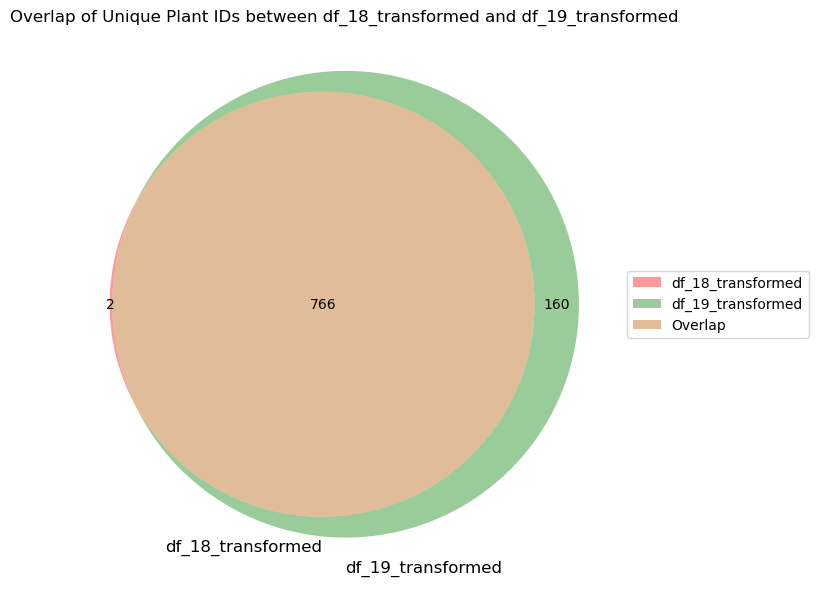

In [70]:
import os
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Get unique Plant IDs from each dataframe
plant_ids_18 = set(df_18_transformed['Plant Id'].unique())
plant_ids_19 = set(df_19_transformed['Plant Id'].unique())

# Create the Venn diagram
plt.figure(figsize=(10, 6))
v = venn2([plant_ids_18, plant_ids_19], 
          set_labels=('df_18_transformed', 'df_19_transformed'))

# Add a legend
plt.legend(v.patches, ['df_18_transformed', 'df_19_transformed', 'Overlap'], 
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Overlap of Unique Plant IDs between df_18_transformed and df_19_transformed")
plt.tight_layout()

# Save the plot
path = r'/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/viz'
save_path = os.path.join(path, 'UniquePlantId_18_19.png')
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight')

# Print confirmation
print(f"Plot saved to {save_path}")

# Show the plot (optional, if you want to display it as well)
plt.show()


In [71]:
plant_ids_18 = set(df_18_transformed['Plant Id'].unique())
plant_ids_19 = set(df_19_transformed['Plant Id'].unique())

print(f"Unique Plant IDs in df_18: {len(plant_ids_18)}")
print(f"Unique Plant IDs in df_19: {len(plant_ids_19)}")


Unique Plant IDs in df_18: 768
Unique Plant IDs in df_19: 926


In [72]:
overlap = plant_ids_18.intersection(plant_ids_19)
only_in_18 = plant_ids_18 - plant_ids_19
only_in_19 = plant_ids_19 - plant_ids_18

print(f"Plant IDs in both datasets: {len(overlap)}")
print(f"Plant IDs only in df_18: {len(only_in_18)}")
print(f"Plant IDs only in df_19: {len(only_in_19)}")


Plant IDs in both datasets: 766
Plant IDs only in df_18: 2
Plant IDs only in df_19: 160


In [73]:
df_18_only = df_18_transformed[df_18_transformed['Plant Id'].isin(only_in_18)]
df_19_only = df_19_transformed[df_19_transformed['Plant Id'].isin(only_in_19)]
df_overlap = df_18_transformed[df_18_transformed['Plant Id'].isin(overlap)]

print(f"Rows for Plant IDs only in df_18: {len(df_18_only)}")
print(f"Rows for Plant IDs only in df_19: {len(df_19_only)}")
print(f"Rows for overlapping Plant IDs: {len(df_overlap)}")


Rows for Plant IDs only in df_18: 36
Rows for Plant IDs only in df_19: 8088
Rows for overlapping Plant IDs: 14347


In [74]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_18_only.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_18_only.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_18_only.csv' has been created successfully.


In [75]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'df_19_only.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
df_19_only.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'df_19_only.csv' has been created successfully.


### Before committing to merging Cooling System Information with Cooling Boiler Generator Detail, just trying to figure out whether the Plant Id's make sense. 

In [77]:
# Step 1: Extract Unique Plant Ids
#Get unique Plant IDs from df_1_USPR and df_3_transformed
plant_ids_1 = set(df_1_USPR['Plant Id'].unique())
plant_ids_3 = set(df_3_transformed['Plant Id'].unique())

# Get unique Plant IDs only in df_19
plant_ids_19_only = set(df_19_only['Plant Id'].unique())


In [78]:
# Step 2: Check overlaps
# Check overlaps with df_1_USPR
overlap_with_df_1 = plant_ids_19_only.intersection(plant_ids_1)
print(f"Number of Plant IDs in df_19_only that overlap with df_1_USPR: {len(overlap_with_df_1)}")

# Check overlaps with df_3_transformed
overlap_with_df_3 = plant_ids_19_only.intersection(plant_ids_3)
print(f"Number of Plant IDs in df_19_only that overlap with df_3_transformed: {len(overlap_with_df_3)}")

# Check overlaps with both df_1_USPR and df_3_transformed
overlap_with_both = plant_ids_19_only.intersection(plant_ids_1, plant_ids_3)
print(f"Number of Plant IDs in df_19_only that overlap with both df_1_USPR and df_3_transformed: {len(overlap_with_both)}")


Number of Plant IDs in df_19_only that overlap with df_1_USPR: 40
Number of Plant IDs in df_19_only that overlap with df_3_transformed: 2
Number of Plant IDs in df_19_only that overlap with both df_1_USPR and df_3_transformed: 2


In [79]:
# Step 3 Investigate overlapping Ids
# Create a dataframe for overlaps with df_1_USPR
df_overlap_with_df_1 = df_19_only[df_19_only['Plant Id'].isin(overlap_with_df_1)]

# Create a dataframe for overlaps with df_3_transformed
df_overlap_with_df_3 = df_19_only[df_19_only['Plant Id'].isin(overlap_with_df_3)]

# Create a dataframe for overlaps with both
df_overlap_with_both = df_19_only[df_19_only['Plant Id'].isin(overlap_with_both)]

# Print some details
print(f"Rows in df_overlap_with_df_1: {len(df_overlap_with_df_1)}")
print(f"Rows in df_overlap_with_df_3: {len(df_overlap_with_df_3)}")
print(f"Rows in df_overlap_with_both: {len(df_overlap_with_both)}")


Rows in df_overlap_with_df_1: 2556
Rows in df_overlap_with_df_3: 84
Rows in df_overlap_with_both: 84


/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_57214/344404673.py:10: UserWarning: Legend does not support handles for NoneType instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(v.patches, ['df_19_only', 'df_1_USPR', 'df_3_transformed',


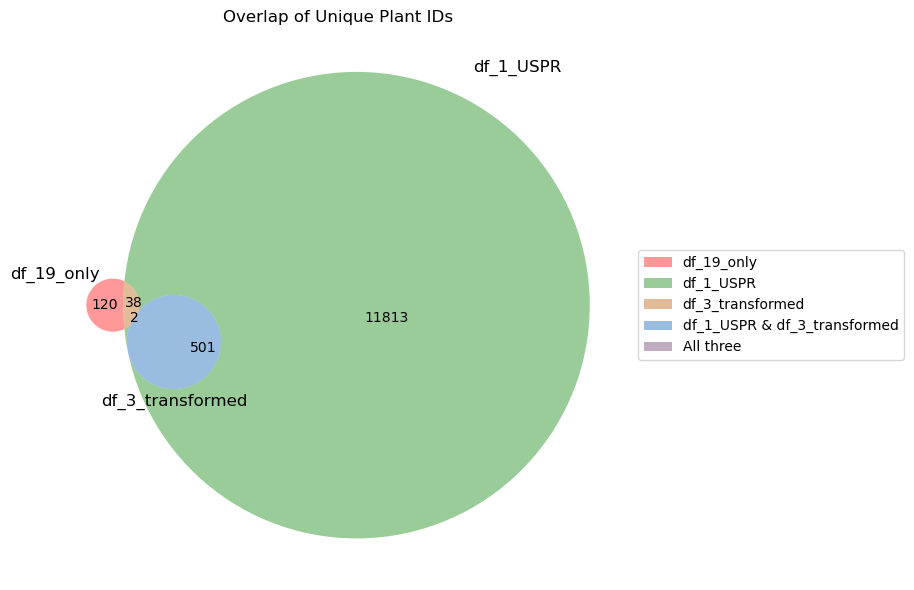

In [80]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
v = venn3([plant_ids_19_only, plant_ids_1, plant_ids_3], 
          set_labels=('df_19_only', 'df_1_USPR', 'df_3_transformed'))
plt.title("Overlap of Unique Plant IDs")

# Add a legend
plt.legend(v.patches, ['df_19_only', 'df_1_USPR', 'df_3_transformed', 
                       'df_19_only & df_1_USPR', 'df_19_only & df_3_transformed', 
                       'df_1_USPR & df_3_transformed', 'All three'],
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


Number of Plant IDs in df_18_only that overlap with df_1_USPR: 2
Number of Plant IDs in df_18_only that overlap with df_3_transformed: 0
Number of Plant IDs in df_18_only that overlap with both df_1_USPR and df_3_transformed: 0
Rows in df_18_overlap_with_df_1: 36
Rows in df_18_overlap_with_df_3: 0
Rows in df_18_overlap_with_both: 0


/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_57214/1319774148.py:29: UserWarning: Legend does not support handles for NoneType instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(v.patches, ['df_18_only', 'df_1_USPR', 'df_3_transformed',


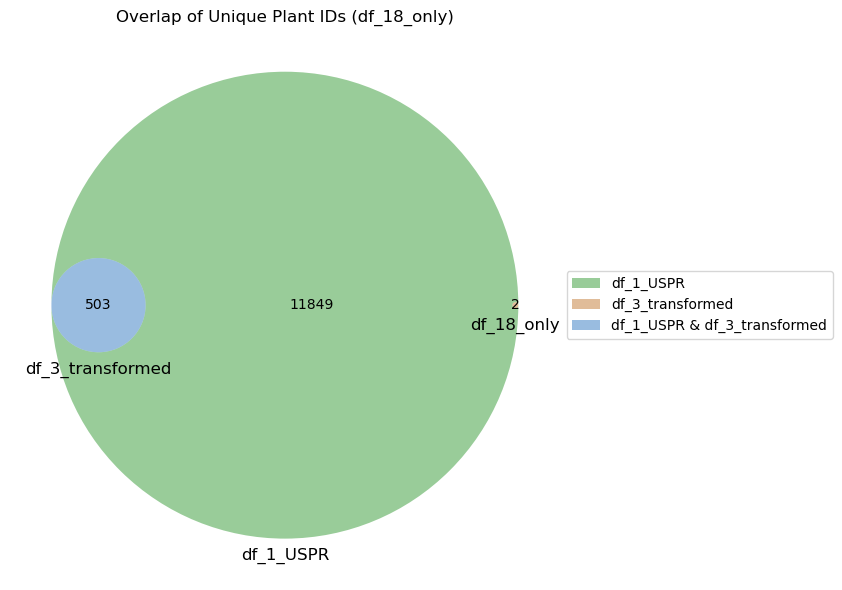

In [81]:
# Get unique Plant IDs from df_18_only
plant_ids_18_only = set(df_18_only['Plant Id'].unique())

# Check overlaps with df_1_USPR and df_3_transformed
overlap_18_with_df_1 = plant_ids_18_only.intersection(plant_ids_1)
overlap_18_with_df_3 = plant_ids_18_only.intersection(plant_ids_3)
overlap_18_with_both = plant_ids_18_only.intersection(plant_ids_1, plant_ids_3)

print(f"Number of Plant IDs in df_18_only that overlap with df_1_USPR: {len(overlap_18_with_df_1)}")
print(f"Number of Plant IDs in df_18_only that overlap with df_3_transformed: {len(overlap_18_with_df_3)}")
print(f"Number of Plant IDs in df_18_only that overlap with both df_1_USPR and df_3_transformed: {len(overlap_18_with_both)}")

# Create dataframes for overlaps
df_18_overlap_with_df_1 = df_18_only[df_18_only['Plant Id'].isin(overlap_18_with_df_1)]
df_18_overlap_with_df_3 = df_18_only[df_18_only['Plant Id'].isin(overlap_18_with_df_3)]
df_18_overlap_with_both = df_18_only[df_18_only['Plant Id'].isin(overlap_18_with_both)]

print(f"Rows in df_18_overlap_with_df_1: {len(df_18_overlap_with_df_1)}")
print(f"Rows in df_18_overlap_with_df_3: {len(df_18_overlap_with_df_3)}")
print(f"Rows in df_18_overlap_with_both: {len(df_18_overlap_with_both)}")

# Create Venn diagram for df_18_only
plt.figure(figsize=(10, 6))
v = venn3([plant_ids_18_only, plant_ids_1, plant_ids_3], 
          set_labels=('df_18_only', 'df_1_USPR', 'df_3_transformed'))
plt.title("Overlap of Unique Plant IDs (df_18_only)")

# Add a legend
plt.legend(v.patches, ['df_18_only', 'df_1_USPR', 'df_3_transformed', 
                       'df_18_only & df_1_USPR', 'df_18_only & df_3_transformed', 
                       'df_1_USPR & df_3_transformed', 'All three'],
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


#### Key Observations (attribution: Perplexity (Instance ID: Perplexity-20250320-1119))

##### Disproportionate Overlap for df_19_only:
- While only **40 unique Plant IDs** from df_19_only overlap with df_1_USPR, this translates to a whopping **2556 rows**.
  - This suggests that many of these overlapping plants have multiple records (e.g., different months, cooling systems, or generators).
- Similarly, while only **2 unique Plant IDs** overlap with both datasets (df_1_USPR and df_3_transformed), this still results in **84 rows**.

##### Minimal Overlap for df_18_only:
- The overlap for unique Plant IDs is very small (**only 2 with df_1_USPR**) and nonexistent for df_3_transformed.
- The row-level overlaps reflect this minimal connection—only **36 rows** overlap with df_1_USPR.

##### No Connection Between df_18_only and df_3_transformed:
- There is no shared data between these two datasets at the unique Plant ID level.


# Step 5. Merge

/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_57214/3086032302.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna('Unknown', inplace=True)
/var/folders/6r/kznwmt6j1rsfwtfplchqpwj00000gn/T/ipykernel_57214/3086032302.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83081 entries, 0 to 83080
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         83081 non-null  object 
 1   Year                                          83081 non-null  int64  
 2   Month                                         83081 non-null  int64  
 3   Plant Id                                      83081 non-null  int64  
 4   Cooling_System_ID                             83081 non-null  object 
 5   Generator_ID                                  83081 non-null  object 
 6   Boiler_ID                                     83081 non-null  object 
 7   Generator_Primary_Technology                  83081 non-null  object 
 8   Fuel_Consumption_from_All_Fuel_Types_(MMBTU)  64179 non-null  float64
 9   Coal_Consumption_(MMBTU)                      12235 non-null 

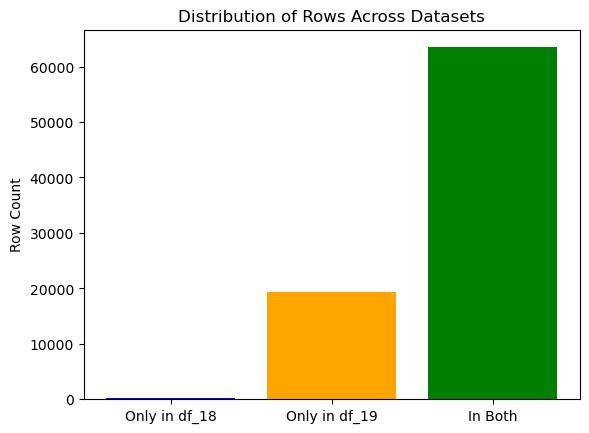

In [151]:
# Step 1: Load the datasets
df_18 = df_18_transformed  
df_19 = df_19_transformed  

# Step 2: Select relevant columns from each dataset
df_18_cols = [
    'Year', 'Month', 'Plant Id', 'Cooling_System_ID', 'Type_of_Cooling_System', 'Hours_in_Service',
    'Diversion_Rate_(gallons_per_minute)', 'Withdrawal_Rate_(gallons_per_minute)',
    'Discharge_Rate_(gallons_per_minute)', 'Consumption_Rate_(gallons_per_minute)',
    'Intake_Average_Temperature_(ºF)', 'Intake_Maximum_Temperature_(ºF)',
    'Discharge_Average_Temperature_(ºF)', 'Discharge_Maximum_Temperature_(ºF)',
    'Diversion_Volume_(million_gallons)', 'Withdrawal_Volume_(million_gallons)',
    'Discharge_Volume_(million_gallons)', 'Consumption_Volume_(million_gallons)'
]

df_19_cols = [
    'State', 'Year', 'Month', 'Plant Id', 'Cooling_System_ID', 'Generator_ID', 'Boiler_ID',
    'Generator_Primary_Technology', 'Fuel_Consumption_from_All_Fuel_Types_(MMBTU)',
    'Coal_Consumption_(MMBTU)', 'Natural_Gas_Consumption_(MMBTU)',
    'Petroleum_Consumption_(MMBTU)', 'Cooling_Unit_Hours_in_Service',
    'Water_Type', 'Water_Source', 'Water_Source_Name', 'Water_Discharge_Name',
    'Combined_Heat_and_Power_Generator?'
]

# Step 3: Create subsets of the original dataframes
df_18_subset = df_18.reindex(columns=df_18_cols)
df_19_subset = df_19.reindex(columns=df_19_cols)

# Step 4: Rename columns to avoid conflicts
df_18_subset.rename(columns={'Hours_in_Service': 'Hours_in_Service_18'}, inplace=True)
df_19_subset.rename(columns={'Cooling_Unit_Hours_in_Service': 'Hours_in_Service_19'}, inplace=True)

# Step 5: Merge the datasets
merged_df = pd.merge(df_19_subset, df_18_subset, 
                     on=['Year', 'Month', 'Plant Id', 'Cooling_System_ID'], 
                     how='outer', 
                     indicator=True)

# Step 6: Create flags for rows present only in one dataset
merged_df['in_df_18_only'] = merged_df['_merge'].map(lambda x: x == 'right_only')
merged_df['in_df_19_only'] = merged_df['_merge'].map(lambda x: x == 'left_only')
merged_df.drop('_merge', axis=1, inplace=True)

# Step 7: Combine Hours_in_Service columns
merged_df['Hours_in_Service'] = merged_df['Hours_in_Service_18'].combine_first(merged_df['Hours_in_Service_19'])
merged_df.drop(['Hours_in_Service_18', 'Hours_in_Service_19'], axis=1, inplace=True)

# Step 8: Handle missing data
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col].fillna('Unknown', inplace=True)
    else:
        merged_df[col].fillna(np.nan, inplace=True)

# Print info about the merged dataset
print(f"\nMerged Dataset Info:\n{merged_df.info()}")
print(f"\nTotal Rows: {len(merged_df)}")
print(f"Rows only in df_18: {merged_df['in_df_18_only'].sum()}")
print(f"Rows only in df_19: {merged_df['in_df_19_only'].sum()}")
print(f"Rows in both datasets: {len(merged_df) - merged_df['in_df_18_only'].sum() - merged_df['in_df_19_only'].sum()}")

# Visualization of merge results
counts = [
    merged_df['in_df_18_only'].sum(),
    merged_df['in_df_19_only'].sum(),
    len(merged_df) - merged_df['in_df_18_only'].sum() - merged_df['in_df_19_only'].sum()
]
labels = ['Only in df_18', 'Only in df_19', 'In Both']

plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.title('Distribution of Rows Across Datasets')
plt.ylabel('Row Count')
plt.show()


#### Dataset Size (attribution: Perplexity (Instance ID: Perplexity-20250320-1119))

| Category | Count |
|----------|-------|
| Total rows | 83,081 |
| Rows only in df_18 | 149 |
| Rows only in df_19 | 19,409 |
| Rows in both datasets | 63,523 |

#### Column Analysis:
- We have 31 columns in total, which matches our expectations.
- The key columns (Year, Month, Plant Id, Cooling_System_ID) have no null values, which is good.
- Generator_ID, Boiler_ID, and other categorical columns from df_19 have no null values, likely due to our 'Unknown' fill.

#### Missing Data:
Water-related metrics (from df_18) have significant missing data. For example:
- Withdrawal_Rate_(gallons_per_minute): 54,023 non-null out of 83,081
- Consumption_Volume_(million_gallons): 50,391 non-null out of 83,081
- Fuel consumption metrics also have missing data, especially for coal and petroleum.

#### Data Types:
- Most numeric columns are float64, which is appropriate for these metrics.
- We have boolean flags for rows only in df_18 or df_19.

#### Warnings:
We're getting FutureWarnings about inplace operations on DataFrame copies. This doesn't affect our current results but should be addressed in future versions.


In [153]:
# Export data to CSV
path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed'
output_file = 'MERGE_water_df.csv'
full_path = os.path.join(path, output_file)

# Save the dataframe
merged_df.to_csv(full_path, index=False)

# Check if the file was created successfully
if os.path.exists(full_path):
    print(f"Saving confirmed: '{output_file}' has been created successfully.")
else:
    print("Error: File was not saved.")


Saving confirmed: 'MERGE_water_df.csv' has been created successfully.


In [155]:
# Set the correct file path
file_path = '/Users/amyzhang/Desktop/A6_Dashboard/Datasets/EIA Datasets/transformed/MERGE_water_df.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Re-import the CSV with specified data types
    water_df = pd.read_csv(file_path)
    # Display dtypes
    print(water_df.dtypes.to_string())
else:
    print(f"File not found: {file_path}")


State                                            object
Year                                              int64
Month                                             int64
Plant Id                                          int64
Cooling_System_ID                                object
Generator_ID                                     object
Boiler_ID                                        object
Generator_Primary_Technology                     object
Fuel_Consumption_from_All_Fuel_Types_(MMBTU)    float64
Coal_Consumption_(MMBTU)                        float64
Natural_Gas_Consumption_(MMBTU)                 float64
Petroleum_Consumption_(MMBTU)                   float64
Water_Type                                       object
Water_Source                                     object
Water_Source_Name                                object
Water_Discharge_Name                             object
Combined_Heat_and_Power_Generator?               object
Type_of_Cooling_System                          

In [137]:
water_df.shape

(83081, 32)

In [138]:
df_1_USPR.columns

Index(['YEAR', 'Plant Id', 'Nuclear Unit Id', 'Combined Heat And Power Plant',
       'Plant Name', 'Operator Name', 'Operator Id', 'Plant State',
       'Census Region', 'NERC Region', 'EIA Sector Number', 'Sector Name',
       'NAICS Code', 'Reported Prime Mover', 'Reported Fuel Type Code',
       'MER Fuel Type Code', 'Balancing Authority Code', 'Physical Unit Label',
       'Tot_MMBtu January', 'Elec_MMBtu January', 'Netgen January',
       'Tot_MMBtu February', 'Elec_MMBtu February', 'Netgen February',
       'Tot_MMBtu March', 'Elec_MMBtu March', 'Netgen March',
       'Tot_MMBtu April', 'Elec_MMBtu April', 'Netgen April', 'Tot_MMBtu May',
       'Elec_MMBtu May', 'Netgen May', 'Tot_MMBtu June', 'Elec_MMBtu June',
       'Netgen June', 'Tot_MMBtu July', 'Elec_MMBtu July', 'Netgen July',
       'Tot_MMBtu August', 'Elec_MMBtu August', 'Netgen August',
       'Tot_MMBtu September', 'Elec_MMBtu September', 'Netgen September',
       'Tot_MMBtu October', 'Elec_MMBtu October', 'Netgen

In [139]:
df_3_transformed.columns

Index(['YEAR', 'Plant Id', 'Combined Heat And Power Plant', 'Plant Name',
       'Operator Name', 'Operator Id', 'Plant State', 'Census Region',
       'NERC Region', 'EIA Sector Number', 'Sector Name', 'NAICS Code',
       'Reported Prime Mover', 'Reported Fuel Type Code', 'MER Fuel Type Code',
       'Balancing Authority Code', 'Physical Unit Label', 'Quantity January',
       'Elec_Quantity January', 'Grossgen January', 'Netgen January',
       'Quantity February', 'Elec_Quantity February', 'Grossgen February',
       'Netgen February', 'Quantity March', 'Elec_Quantity March',
       'Grossgen March', 'Netgen March', 'Quantity April',
       'Elec_Quantity April', 'Grossgen April', 'Netgen April', 'Quantity May',
       'Elec_Quantity May', 'Grossgen May', 'Netgen May', 'Quantity June',
       'Elec_Quantity June', 'Grossgen June', 'Netgen June', 'Quantity July',
       'Elec_Quantity July', 'Grossgen July', 'Netgen July', 'Quantity August',
       'Elec_Quantity August', 'Grossgen 